In [1]:
##import all library required for assignment
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

In [2]:
##Read CSV file
loans = pd.read_csv('loan.csv',low_memory=False)

In [3]:
##Observe data
loans.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
##observe shape
loans.shape

(39717, 111)

In [5]:
len(loans)

39717

### Data Understanding and Cleaning and Manipulation

**Remove columns with half NA values**

In [6]:
loans = loans.dropna(thresh=len(loans)/2,axis=1)

In [7]:
loans.shape

(39717, 54)

**Removing column with only 1 unique value as it wont reveal comparitive info for EDA** 

In [8]:
loans = loans.loc[:,loans.apply(pd.Series.nunique)!=1]

In [9]:
loans.shape

(39717, 45)

**After scanning through various features,loan status column is appropriate target variable. We can see impact of various features on this target variable to identify Key driving factors** 

In [10]:
loans['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [11]:
## Since we are interested in whether borrower will default or fully pay loan, we will drop loan_status = Current rows
loans=loans[loans.loan_status!='Current']

In [12]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       38577 non-null  int64  
 1   member_id                38577 non-null  int64  
 2   loan_amnt                38577 non-null  int64  
 3   funded_amnt              38577 non-null  int64  
 4   funded_amnt_inv          38577 non-null  float64
 5   term                     38577 non-null  object 
 6   int_rate                 38577 non-null  object 
 7   installment              38577 non-null  float64
 8   grade                    38577 non-null  object 
 9   sub_grade                38577 non-null  object 
 10  emp_title                36191 non-null  object 
 11  emp_length               37544 non-null  object 
 12  home_ownership           38577 non-null  object 
 13  annual_inc               38577 non-null  float64
 14  verification_status   

**Dropping columns** 
- Which are related to outcome once loan is approved. These variables wont be available for new loan while evaluating will borrower default or no. 
- Columns like id/url which are random and wont impact borrowers ability to pay loan
- Subgrade/zipcode etc which will be covered with grade/state
- Title and employment title/desc which has lot of variations so wont be that useful without advance techniques

In [13]:
loans = loans.drop(['id','member_id','sub_grade','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','funded_amnt_inv','title','emp_title','zip_code','url','desc'],axis=1)

In [14]:
loans.shape

(38577, 24)

In [15]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   term                  38577 non-null  object 
 3   int_rate              38577 non-null  object 
 4   installment           38577 non-null  float64
 5   grade                 38577 non-null  object 
 6   emp_length            37544 non-null  object 
 7   home_ownership        38577 non-null  object 
 8   annual_inc            38577 non-null  float64
 9   verification_status   38577 non-null  object 
 10  issue_d               38577 non-null  object 
 11  loan_status           38577 non-null  object 
 12  purpose               38577 non-null  object 
 13  addr_state            38577 non-null  object 
 14  dti                   38577 non-null  float64
 15  delinq_2yrs        

**Observing Feature values**

In [16]:
loans.isnull().sum()

loan_amnt                  0
funded_amnt                0
term                       0
int_rate                   0
installment                0
grade                      0
emp_length              1033
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
pub_rec_bankruptcies     697
dtype: int64

In [17]:
loans['pub_rec_bankruptcies'].value_counts()

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [18]:
loans['revol_util'].value_counts()

0%        954
0.20%      62
63%        62
31.20%     57
40.70%     57
         ... 
60.69%      1
32.04%      1
39.95%      1
5.33%       1
17.71%      1
Name: revol_util, Length: 1088, dtype: int64

In [19]:
loans['term'].value_counts()

 36 months    29096
 60 months     9481
Name: term, dtype: int64

In [20]:
loans['emp_length'].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [21]:
loans['home_ownership'].value_counts()

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [22]:
loans['verification_status'].value_counts()

Not Verified       16694
Verified           12206
Source Verified     9677
Name: verification_status, dtype: int64

In [23]:
loans['delinq_2yrs'].value_counts()

0     34386
1      3207
2       673
3       212
4        60
5        21
6        10
7         4
8         2
11        1
9         1
Name: delinq_2yrs, dtype: int64

In [24]:
loans['earliest_cr_line'].value_counts()

Oct-99    360
Nov-98    357
Oct-00    341
Dec-98    340
Dec-97    318
         ... 
Jun-72      1
Oct-68      1
Feb-67      1
Oct-54      1
Sep-65      1
Name: earliest_cr_line, Length: 524, dtype: int64

In [25]:
loans['inq_last_6mths'].value_counts()

0    18709
1    10660
2     5654
3     2983
4      316
5      144
6       63
7       34
8       14
Name: inq_last_6mths, dtype: int64

**Addressing data quality issues**

In [26]:
loans.isnull().sum()

loan_amnt                  0
funded_amnt                0
term                       0
int_rate                   0
installment                0
grade                      0
emp_length              1033
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
pub_rec_bankruptcies     697
dtype: int64

In [27]:
loans.shape

(38577, 24)

In [28]:
##Removing rows with NA revolving util 
loans=loans[loans.revol_util.notnull()]

In [29]:
##Coverting column to numeric data
loans['revol_util'] = loans['revol_util'].apply(lambda x: str(x).replace('%','')).apply(pd.to_numeric)

In [30]:
##Employment length keeping for now. Will evaluate if impact analysis and remove later if needed
##loans=loans[loans.emp_length.notnull()]

In [31]:
loans.shape

(38527, 24)

In [32]:
loans.isnull().sum()

loan_amnt                  0
funded_amnt                0
term                       0
int_rate                   0
installment                0
grade                      0
emp_length              1030
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
pub_rec_bankruptcies     697
dtype: int64

In [33]:
##checking Correlation across variables to check redundant data
loans.corr()

,loan_amnt,funded_amnt,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.981766,0.932187,0.268899,0.061899,-0.031998,0.012902,0.176318,-0.050140,0.313514,0.063489,0.255242,-0.036150
funded_amnt,0.981766,1.000000,0.957992,0.264695,0.061654,-0.031914,0.012818,0.174806,-0.050720,0.305991,0.067356,0.249606,-0.037164
installment,0.932187,0.957992,1.000000,0.267752,0.051497,-0.019801,0.010981,0.172105,-0.045839,0.309048,0.093049,0.228947,-0.033520
annual_inc,0.268899,0.264695,0.267752,1.000000,-0.121668,0.022082,0.035528,0.156794,-0.017958,0.277253,0.016707,0.234388,-0.016280
dti,0.061899,0.061654,0.051497,-0.121668,1.000000,-0.033500,0.001941,0.287996,-0.004870,0.227936,0.278941,0.228868,0.005686
delinq_2yrs,-0.031998,-0.031914,-0.019801,0.022082,-0.033500,1.000000,0.008742,0.011797,0.007708,-0.055127,-0.042616,0.066988,0.003456
inq_last_6mths,0.012902,0.012818,0.010981,0.035528,0.001941,0.008742,1.000000,0.093615,0.023820,-0.020753,-0.070206,0.113659,0.015511
open_acc,0.176318,0.174806,0.172105,0.156794,0.287996,0.011797,0.093615,1.000000,-0.000027,0.287420,-0.089923,0.687034,0.005700
pub_rec,-0.050140,-0.050720,-0.045839,-0.017958,-0.004870,0.007708,0.023820,-0.000027,1.000000,-0.060612,0.058942,-0.023611,0.846057
revol_bal,0.313514,0.305991,0.309048,0.277253,0.227936,-0.055127,-0.020753,0.287420,-0.060612,1.000000,0.301248,0.311990,-0.048723


In [34]:
##Dropping columns with higher correlation so redundant data (loans/pub_rec/open_acc)
loans.drop(['installment','pub_rec_bankruptcies','total_acc'],axis=1,inplace=True)

In [35]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38527 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38527 non-null  int64  
 1   funded_amnt          38527 non-null  int64  
 2   term                 38527 non-null  object 
 3   int_rate             38527 non-null  object 
 4   grade                38527 non-null  object 
 5   emp_length           37497 non-null  object 
 6   home_ownership       38527 non-null  object 
 7   annual_inc           38527 non-null  float64
 8   verification_status  38527 non-null  object 
 9   issue_d              38527 non-null  object 
 10  loan_status          38527 non-null  object 
 11  purpose              38527 non-null  object 
 12  addr_state           38527 non-null  object 
 13  dti                  38527 non-null  float64
 14  delinq_2yrs          38527 non-null  int64  
 15  earliest_cr_line     38527 non-null 

In [36]:
##Converting interest rate to numeric so quantitative analysis can be done later
loans['int_rate']=loans['int_rate'].apply(lambda x: float(x.replace('%','')))

In [37]:
def handleyear(d):
    if d > datetime.now():
        d = datetime(d.year - 100, d.month, d.day)
    return d

In [38]:
##Create derived column for year from earliest credit line
loans['earliest_cr_line_year'] = loans['earliest_cr_line'].apply(lambda x: datetime.strptime(x, '%b-%y')).apply(handleyear).dt.year

In [39]:
##Create derived column for year from issue date
loans['issue_d_year'] = loans['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y')).apply(handleyear).dt.year

In [40]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38527 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   loan_amnt              38527 non-null  int64  
 1   funded_amnt            38527 non-null  int64  
 2   term                   38527 non-null  object 
 3   int_rate               38527 non-null  float64
 4   grade                  38527 non-null  object 
 5   emp_length             37497 non-null  object 
 6   home_ownership         38527 non-null  object 
 7   annual_inc             38527 non-null  float64
 8   verification_status    38527 non-null  object 
 9   issue_d                38527 non-null  object 
 10  loan_status            38527 non-null  object 
 11  purpose                38527 non-null  object 
 12  addr_state             38527 non-null  object 
 13  dti                    38527 non-null  float64
 14  delinq_2yrs            38527 non-null  int64  
 15  ea

### Data Analysis

**Univariant Analysis/Segmented univariate Analysis**

In [41]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38527 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   loan_amnt              38527 non-null  int64  
 1   funded_amnt            38527 non-null  int64  
 2   term                   38527 non-null  object 
 3   int_rate               38527 non-null  float64
 4   grade                  38527 non-null  object 
 5   emp_length             37497 non-null  object 
 6   home_ownership         38527 non-null  object 
 7   annual_inc             38527 non-null  float64
 8   verification_status    38527 non-null  object 
 9   issue_d                38527 non-null  object 
 10  loan_status            38527 non-null  object 
 11  purpose                38527 non-null  object 
 12  addr_state             38527 non-null  object 
 13  dti                    38527 non-null  float64
 14  delinq_2yrs            38527 non-null  int64  
 15  ea

In [42]:
##create derived metrics to aggregate charged off cases later
loans['loan_status_failed'] = loans['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)

In [43]:
loans['loan_status'].value_counts()

Fully Paid     32916
Charged Off     5611
Name: loan_status, dtype: int64

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Loan Status')]

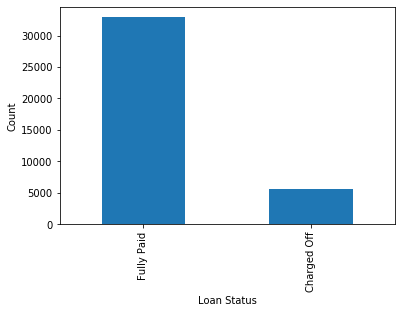

In [44]:
g=loans['loan_status'].value_counts().plot.bar()
g.set(xlabel='Loan Status',ylabel='Count')

**Perentage of total loans charged off. Our goal is to give actionable suggestions to reduce this. Also for new loans, setup guideline so data driven decision can be taken**



In [45]:
##Perentage of total loans charged off. Any feature variation which increases default rate beyond average will have opportunity to improve while screening loans
round((loans['loan_status'].value_counts()[1]/loans.shape[0]),4)*100

14.56

**Annual income between 10-100K have more defaults**

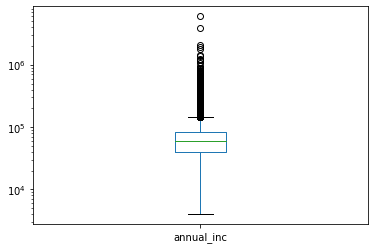

In [46]:
g=loans.annual_inc.plot.box()
g.set_yscale('log')

In [47]:
##bucketing annual income ranges
loans['income_range'] = pd.cut(loans.annual_inc,bins=[0,10000,30000,50000,100000,10000000],labels=['below 10K','>10K & <30K','>30K &< 50K','>50K & <100K','>100K'])

[Text(0, 0.5, 'Default Count'), Text(0.5, 0, 'Income Range')]

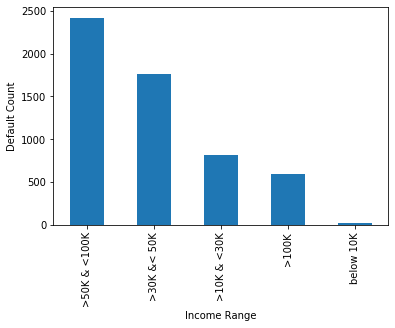

In [48]:
## total Charge off in each income bucket
g=loans[loans['loan_status']=='Charged Off']['income_range'].value_counts().plot.bar()
g.set(xlabel='Income Range',ylabel='Default Count')

In [49]:
##relative sense
(loans[loans['loan_status']=='Charged Off']['income_range'].value_counts()/loans['income_range'].value_counts())

below 10K       0.204301
>10K & <30K     0.183089
>30K &< 50K     0.163324
>50K & <100K    0.136764
>100K           0.108069
Name: income_range, dtype: float64

**Loan amount by income vs default rate using data driven matrix**

In [50]:
## Data driven matrix
loans['amt_by_income']=round((loans['funded_amnt']/loans['annual_inc']),4)

In [51]:
loans['amt_by_income'].mean()

0.18210906636903948

In [52]:
loans.groupby(by='loan_status')['amt_by_income'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5611.0,0.213619,0.126457,0.0052,0.1130,0.1923,0.2941,0.7712
Fully Paid,32916.0,0.176738,0.108763,0.0008,0.0941,0.1549,0.2381,0.8300


[Text(0, 0.5, 'Funded Amt / Income'), Text(0.5, 0, 'Loan Status')]

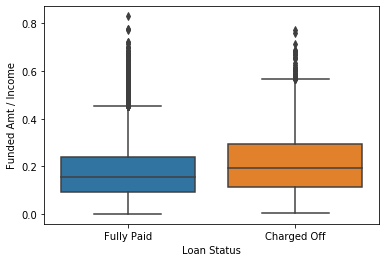

In [53]:
##
g=sns.boxplot(loans.loan_status,loans.amt_by_income)
g.set(xlabel='Loan Status',ylabel='Funded Amt / Income')

In [54]:
##bucketing income range 
loans['amt_by_income_range_cat'] = pd.cut(loans.amt_by_income,bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],labels=['0-0.1','0.1-0.2','0.2-0.3','0.3-0.4','0.4-0.5','0.5-0.6','0.6-0.7','0.7-0.8','0.8-0.9','0.9-1'])

**Beyond 30% funded amount to annual income ratio, default risk increases beyond average of 14%(overall default rate) so reduce funded amount/stop giving such loans so overall default average will also go down**



[Text(0, 0.5, 'Fraction of Default'), Text(0.5, 0, 'Funded Amt / Income')]

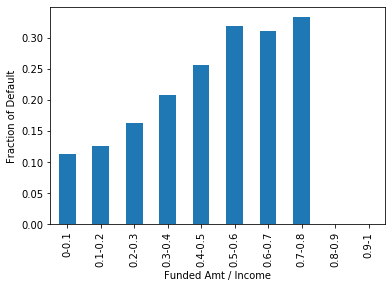

In [55]:
g=round(loans.groupby(by='amt_by_income_range_cat')['loan_status_failed'].mean(),4).plot.bar()
g.set(xlabel='Funded Amt / Income',ylabel='Fraction of Default')

**dti vs loan status using data driven matrix**

[Text(0, 0.5, 'dti'), Text(0.5, 0, 'Loan Status')]

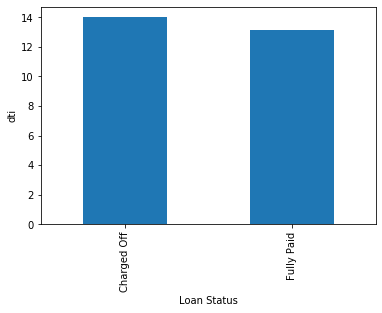

In [56]:
g=round(loans.groupby(by='loan_status')['dti'].mean(),4).plot.bar()
g.set(xlabel='Loan Status',ylabel='dti')

In [57]:
loans['dti'].describe()

count    38527.000000
mean        13.276353
std          6.671392
min          0.000000
25%          8.140000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: float64

In [58]:
##bucketing dti range 
loans['dti_range_cat'] = pd.cut(loans.dti,bins=[0,5,10,15,20,25,30],labels=['0-5','5-10','10-15','15-20','20-25','25-30'])

**Loan become risky with increased dti >20, so reduce funded amount**

[Text(0, 0.5, 'Fraction of Default'), Text(0.5, 0, 'dti Range')]

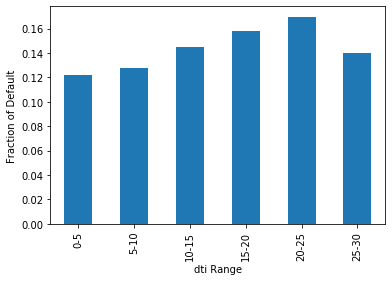

In [59]:
##loan become risky with increased dti >20, so reduce funded amount
g=round(loans.groupby(by='dti_range_cat')['loan_status_failed'].mean(),4).plot.bar()
g.set(xlabel='dti Range',ylabel='Fraction of Default')

In [60]:
loans.groupby(by='dti_range_cat')['loan_status_failed'].mean()

dti_range_cat
0-5      0.122026
5-10     0.127527
10-15    0.145114
15-20    0.157614
20-25    0.169659
25-30    0.139647
Name: loan_status_failed, dtype: float64

**Higher interest rates causes more defaults so reducing funding amount for high risk loans makes more sense**

In [61]:
##Interest rate increases as Grade goes down, however we are seeing more defaults with increased rate so better reduce funded amount
loans.groupby(by='grade').int_rate.mean()

grade
A     7.330979
B    11.007814
C    13.534224
D    15.662780
E    17.631629
F    19.649536
G    21.312424
Name: int_rate, dtype: float64

In [62]:
loans.groupby(by='loan_status').int_rate.describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5611.0,13.813317,3.653971,5.42,11.28,13.57,16.40,24.40
Fully Paid,32916.0,11.605893,3.599073,5.42,8.49,11.49,13.99,24.11


[Text(0, 0.5, 'Interest Rates %'), Text(0.5, 0, 'Grade')]

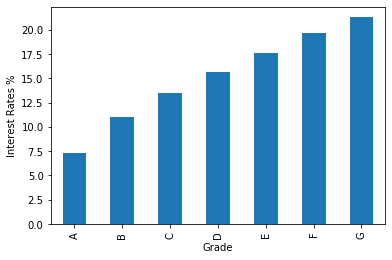

In [63]:
g=loans.groupby(by='grade').int_rate.mean().plot.bar()
g.set(xlabel='Grade',ylabel='Interest Rates %')

[Text(0, 0.5, 'Interest Rates'), Text(0.5, 0, 'Loan Status')]

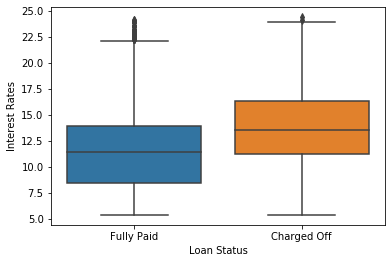

In [64]:
g=sns.boxplot(loans['loan_status'],loans['int_rate'])
g.set(xlabel='Loan Status',ylabel='Interest Rates')

**More relative defaults with lower Grades so reduce funding amount for lower grades.**

[Text(0, 0.5, 'Proportion of default'), Text(0.5, 0, 'Grade')]

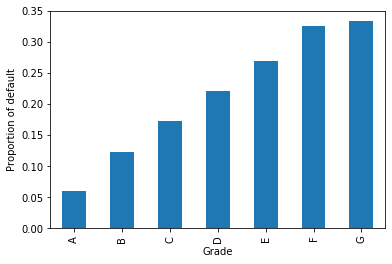

In [65]:
g=(loans[loans['loan_status']=='Charged Off']['grade'].value_counts()/loans['grade'].value_counts()).plot.bar()
g.set(xlabel='Grade',ylabel='Proportion of default')

In [66]:
##total defaults per grade
loans[loans['loan_status']=='Charged Off']['grade'].value_counts()

B    1425
C    1343
D    1115
E     711
A     602
F     316
G      99
Name: grade, dtype: int64

**More relative defaults with 60 month tenure**

[Text(0, 0.5, 'Proportion of default'), Text(0.5, 0, 'Term')]

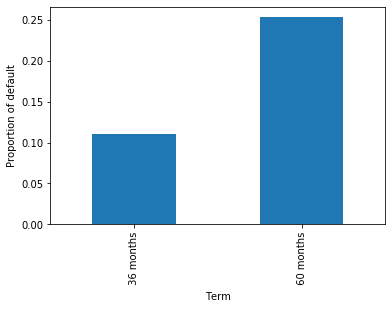

In [67]:
g=(loans[loans['loan_status']=='Charged Off']['term'].value_counts()/loans['term'].value_counts()).plot.bar()
g.set(xlabel='Term',ylabel='Proportion of default')

**Not much variation based on relative employment length alone**

[Text(0, 0.5, 'Proportion of default'), Text(0.5, 0, 'Employment Length')]

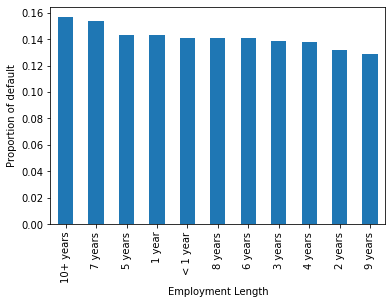

In [68]:
g=(loans[loans['loan_status']=='Charged Off']['emp_length'].value_counts()/loans['emp_length'].value_counts()).sort_values(ascending=False).plot.bar()
g.set(xlabel='Employment Length',ylabel='Proportion of default')

In [69]:
#total defaults per experince bucket
(loans[loans['loan_status']=='Charged Off']['emp_length'].value_counts()).sort_values(ascending=False)

10+ years    1330
< 1 year      635
2 years       566
3 years       555
4 years       460
5 years       457
1 year        453
6 years       305
7 years       263
8 years       202
9 years       158
Name: emp_length, dtype: int64

**Not much variation based on home ownership alone**

[Text(0, 0.5, 'Proportion of default'), Text(0.5, 0, 'Home Ownership')]

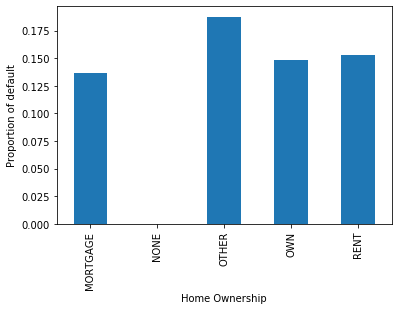

In [70]:
g= (loans[loans['loan_status']=='Charged Off']['home_ownership'].value_counts()/loans['home_ownership'].value_counts()).plot.bar()
g.set(xlabel='Home Ownership',ylabel='Proportion of default')

**Top 5 purpose of loans with defaults.**
**Small business defaulted most which may be due to economic slowdown during 2008/2009 and lesson to be careful while lending next time** 
**with similar situation e.g. slowdown after COVID**

In [71]:
##checking which purpose has >1000 samples
loans['purpose'].value_counts().sort_values(ascending=False)>1000

debt_consolidation     True
credit_card            True
other                  True
home_improvement       True
major_purchase         True
small_business         True
car                    True
wedding               False
medical               False
moving                False
vacation              False
house                 False
educational           False
renewable_energy      False
Name: purpose, dtype: bool

In [72]:
## Filtering records for 1000+ samples
loans_toppurpose = loans[loans['purpose'].isin(['debt_consolidation','credit_card','other','home_improvement','major_purchase','small_business','car'])]

[Text(0, 0.5, 'Proportion of default'), Text(0.5, 0, 'Purpose of loan')]

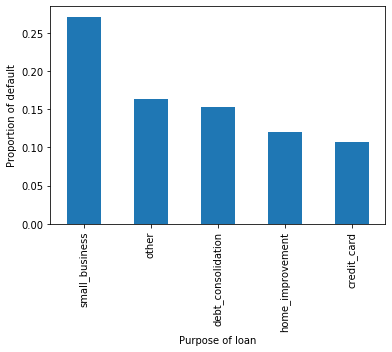

In [73]:
##relative defaults per purpose of loans
g=(loans_toppurpose[loans_toppurpose['loan_status']=='Charged Off']['purpose'].value_counts()/loans_toppurpose['purpose'].value_counts().sort_values(ascending=False)).sort_values(ascending=False)[0:5].plot.bar()
g.set(xlabel='Purpose of loan',ylabel='Proportion of default')

In [74]:
#total defaults per purpose bucket
loans[loans['loan_status']=='Charged Off']['purpose'].value_counts().sort_values(ascending=False)[:5]


debt_consolidation    2762
other                  629
credit_card            541
small_business         475
home_improvement       344
Name: purpose, dtype: int64

**Top 5 states with defaults**

In [75]:
(loans[loans['loan_status']=='Charged Off']['addr_state'].value_counts()).sort_values(ascending=False)[0:5]

CA    1124
FL     503
NY     495
TX     314
NJ     278
Name: addr_state, dtype: int64

[Text(0, 0.5, 'Count of default'), Text(0.5, 0, 'State')]

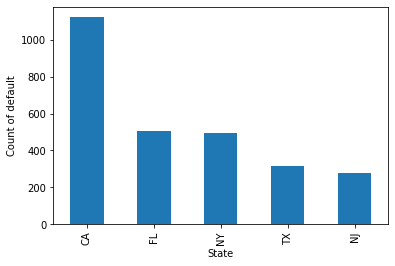

In [76]:
g=(loans[loans['loan_status']=='Charged Off']['addr_state'].value_counts()).sort_values(ascending=False)[0:5].plot.bar()
g.set(xlabel='State',ylabel='Count of default')

In [77]:
##Percentage of loans defaulted based on issued date.
#Seems We have peak just before 2008 financial crisis indicating loans issued during this period are more defaulted 
round(loans[loans['loan_status']=='Charged Off'].issue_d_year.value_counts()/loans.issue_d_year.value_counts(),4)*100

2011    15.86
2010    12.86
2009    12.57
2008    15.64
2007    17.93
Name: issue_d_year, dtype: float64

[Text(0, 0.5, '% Default loan'), Text(0.5, 0, 'Issue year')]

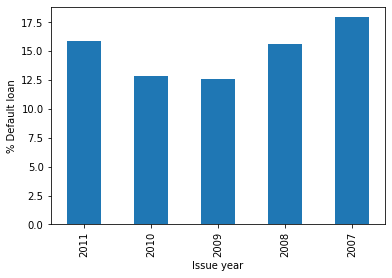

In [78]:
g=(round(loans[loans['loan_status']=='Charged Off'].issue_d_year.value_counts()/loans.issue_d_year.value_counts(),4)*100).plot.bar()
g.set(ylabel='% Default loan',xlabel='Issue year')

In [79]:
loans.issue_d_year.value_counts()

2011    20507
2010    11513
2009     4702
2008     1554
2007      251
Name: issue_d_year, dtype: int64

**Bivariate Analysis**

**Issue year vs Loan status vs borrower experience**

In [80]:
pd.pivot_table(data=loans,index='issue_d_year',columns='emp_length',values="loan_status_failed", aggfunc=np.sum)

emp_length,1 year,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year
issue_d_year,,,,,,,,,,,
2007,8,7,4,2,3,0,2,2,2,2,13
2008,36,56,24,14,22,14,12,10,8,4,43
2009,73,95,78,54,60,36,18,26,22,21,108
2010,106,326,173,177,123,124,66,68,45,43,155
2011,230,846,287,308,252,283,207,157,125,88,316


In [81]:
pd.pivot_table(data=loans,index='issue_d_year',columns='emp_length',values="loan_status", aggfunc=len)

emp_length,1 year,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year
issue_d_year,,,,,,,,,,,
2007,45,27,31,22,12,7,11,8,9,8,71
2008,195,304,188,127,116,80,75,57,64,30,318
2009,638,751,649,465,385,302,197,175,165,167,808
2010,794,2466,1413,1378,1023,1025,554,479,423,367,1274
2011,1491,4939,2005,2016,1799,1776,1328,989,772,654,2025


**2007 years issued loans impacted all years of experince borrowers - may be due to financial crisis**

In [82]:
##2007 years issued loans impacted all years of experince borrowers - may be due to financial crisis.. 
default_exp_issue = round(pd.pivot_table(data=loans,index='issue_d_year',columns='emp_length',values="loan_status_failed", aggfunc=np.sum)/pd.pivot_table(data=loans,index='issue_d_year',columns='emp_length',values="loan_status", aggfunc=len),4)*100

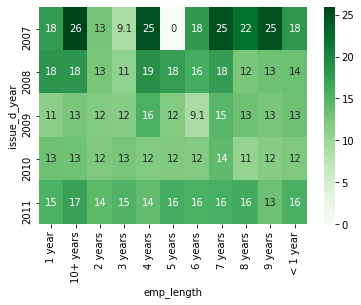

In [83]:
sns.heatmap(default_exp_issue, cmap="Greens",annot=True)

**Issue year vs purpose vs loan status**

**Small business purpose loans default more in % for all issued years. Need to do more screening while lending small business based on potential to grow**

In [84]:
##Small business purpose loans default more in % for all issued years
default_issue_purpose = round(pd.pivot_table(data=loans,index='issue_d_year',columns='purpose',values="loan_status_failed", aggfunc=np.sum)/pd.pivot_table(data=loans,index='issue_d_year',columns='purpose',values="loan_status", aggfunc=len),4)*100

[Text(33.0, 0.5, 'Issued year'), Text(0.5, 14.09375, 'Purpose of loan')]

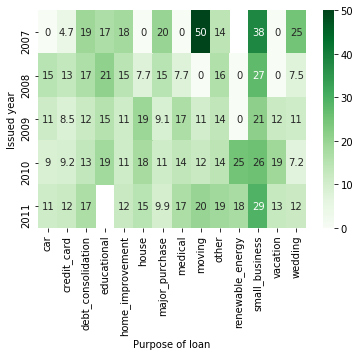

In [85]:
g=sns.heatmap(default_issue_purpose, cmap="Greens",annot=True)
g.set(xlabel='Purpose of loan',ylabel='Issued year')

**Issue year vs grade vs loan status**

**Low grade loans default more in % for all issued years so Grading System working !!!**

In [86]:
##Low grade loans default more in % for all issued years
default_issue_grade = round(pd.pivot_table(data=loans,index='issue_d_year',columns='grade',values="loan_status_failed", aggfunc=np.sum)/pd.pivot_table(data=loans,index='issue_d_year',columns='grade',values="loan_status", aggfunc=len),4)*100

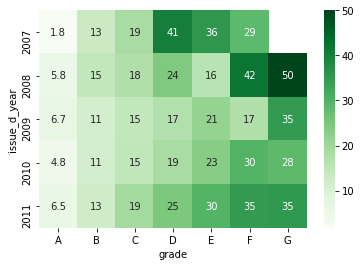

In [87]:
sns.heatmap(default_issue_grade, cmap="Greens",annot=True)

**Loan term vs grade vs loan status**

**Longer term low grade loans default more in %. Give short term loans for low grades with less funding**

In [88]:
##Longer term low grade loans default more in %
default_term_grade = round(pd.pivot_table(data=loans,index='term',columns='grade',values="loan_status_failed", aggfunc=np.sum)/pd.pivot_table(data=loans,index='term',columns='grade',values="loan_status", aggfunc=len),4)*100

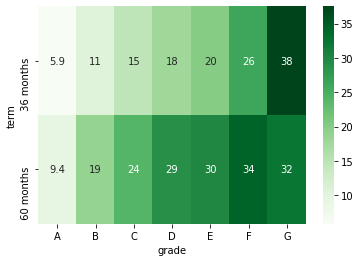

In [89]:
sns.heatmap(default_term_grade, cmap="Greens",annot=True)

**top state vs top purpose vs loan status**

**Florida has higher defaults for almost all loan purposes. Do further check/screening for any interconnection**

In [90]:
loans_temp = loans_toppurpose[loans_toppurpose['addr_state'].isin(['CA','FL','NY','TX','NJ'])]

In [91]:
##Florida has higher defaults for almost all loan purposes
default_state_purpose = pd.pivot_table(data=loans_temp,index='addr_state',columns='purpose',values="loan_status_failed", aggfunc=np.mean)

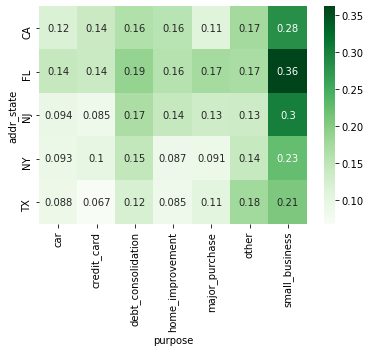

In [92]:
sns.heatmap(default_state_purpose, cmap="Greens",annot=True)

**Checking remaining features spread against target variable**

**Higher revolving utilization means more usage of credit. Seeing more tendency to default** 

In [93]:
loans.groupby(by='loan_status')['revol_util'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5611.0,55.572110,27.905282,0.0,34.4,58.4,79.0,99.9
Fully Paid,32916.0,47.531801,28.276743,0.0,23.9,47.6,70.8,99.9


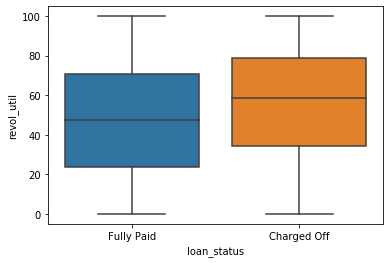

In [94]:
sns.boxplot(loans['loan_status'],loans['revol_util'])

In [95]:
#Lower revolving balance shows borrower tendancy to pay on time and hence loan to be fully paid
loans.groupby(by='loan_status')['revol_bal'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5611.0,13552.780075,15168.517401,0.0,4007.0,9253.0,17553.50,148829.0
Fully Paid,32916.0,13263.299368,15984.772484,0.0,3612.0,8694.0,16827.75,149588.0


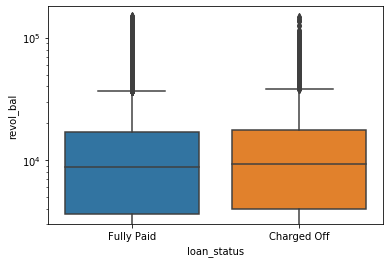

In [96]:
g=sns.boxplot(loans['loan_status'],loans['revol_bal'])
g.set_yscale("log")

**Higher last 6 months inquiry means borrower may be in financial crisis, Seeing more tendency to default** 


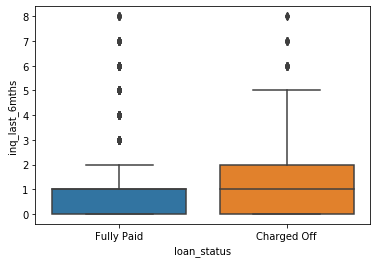

In [97]:
sns.boxplot(loans['loan_status'],loans['inq_last_6mths'])

In [98]:
##Higher public records indicates higher possibility of Charged off
loans.groupby(by='loan_status')['pub_rec'].mean()

loan_status
Charged Off    0.085012
Fully Paid     0.050401
Name: pub_rec, dtype: float64

In [99]:
## Higher Delinquicy may indicate borrowers weaker financial state
loans.groupby(by='loan_status')['delinq_2yrs'].mean()

loan_status
Charged Off    0.170558
Fully Paid     0.142575
Name: delinq_2yrs, dtype: float64

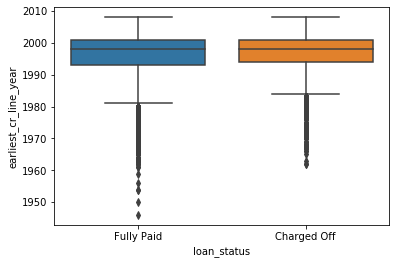

In [100]:
## Older credit line may indicate more reliability 
sns.boxplot(x=loans['loan_status'],y=loans['earliest_cr_line_year'])

# Conclusion

- Our goal is to give **actionable suggestions** to **reduce percentage of defaults**(Current ~14%). Also for new loans, **setup guideline** so data driven decision can be taken.

- **Beyond 30% (funded amount to annual income ratio)**, loan **risk increases** beyond average of 14%(overall default rate) so **reduce funded amount or stop loans** so overall default average will also go down.

- Loan becomes **risky** with increased **dti >20**, so **reduce funded amount**.

- **Higher interest rates** causes **more defaults** so **reducing funding amount for high risk loans** makes more sense.

- **More** relative **defaults** with **lower Grades** so reduce funding amount for lower grades.

- **More** relative **defaults** with **60 month tenure**.

- **Small business defaulted most** which may be due to economic slowdown during 2008/2009 and **lesson to be careful** while lending next time **during economic slowdown** e.g. slowdown after COVID.

- We have peak just before 2008 financial crisis indicating loans issued during this period are more defaulted. 

- 2007 years issued loans impacted all years of experince borrowers - may be due to financial crisis.

- **Small business purpose loans default more** in % for all issued years. Need to do **more screening** while lending small business **based on potential to grow**.

- Low grade loans default more in % for all issued years so **Grading System working !!!**

- Longer term low grade loans default more in %. **Give short term loans for low grades with less funding**.

- **Scrutinize** loans with **higher deliquency/public records/higher inquiries in 6 months, high revolving utilization, high revolving balance**.

- **CA/FL/NY** has higher defaults for almost all loan purposes. Do **further check/screening** for any interconnection.